In [37]:
!pip install sentence-transformers
!pip install sickit-learn
!pip install umap-learn
!pip install matplotlib

ERROR: Could not find a version that satisfies the requirement sickit-learn (from versions: none)
ERROR: No matching distribution found for sickit-learn


In [38]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.metrics.cluster import normalized_mutual_info_score, adjusted_rand_score
from sentence_transformers import SentenceTransformer
from sklearn.cluster import KMeans
import numpy as np
import umap
import matplotlib.pyplot as plt

In [39]:
# Set a higher data rate limit

from IPython.display import display, Javascript
display(Javascript('IPython.notebook.kernel.execute("config=\'--NotebookApp.iopub_data_rate_limit=10000000.0\'")'))

<IPython.core.display.Javascript object>

In [40]:
# Import the Data
ng20 = fetch_20newsgroups(subset='all')
corpus = ng20.data[:2000]
labels = ng20.target[:2000]
k = len(set(labels))

In [41]:
# We need to embed textual data
model = SentenceTransformer('paraphrase-MiniLM-L6-v2')
embeddings = model.encode(corpus)
print(embeddings)

[[-0.42646945  0.07642612  0.2107597  ...  0.23212902 -0.17200306
   0.03950986]
 [-0.18308815 -0.09289979 -0.30110228 ... -0.07557134 -0.17239588
   0.03624691]
 [-0.26677352  0.26834416 -0.23574367 ... -0.25919765 -0.19917384
   0.06848606]
 ...
 [-0.16873735 -0.19733328  0.12419277 ... -0.05022664 -0.05077191
   0.1157267 ]
 [-0.19940856 -0.06319581  0.02552389 ... -0.2887408  -0.18979448
   0.0114287 ]
 [-0.08810844 -0.11422513  0.03702679 ...  0.1126667  -0.03262381
  -0.00777481]]


In [42]:
# Define our dimensionality reduction UMAP function
def dim_red_umap(mat, p):
    '''
    Perform dimensionality reduction using UMAP

    Input:
    -----
        mat : NxM list
        p : number of dimensions to keep
    Output:
    ------
        red_mat : NxP list such that p<<m
    '''

    umap_model = umap.UMAP(n_components=p)
    red_mat = umap_model.fit_transform(embeddings)
    return red_mat

In [43]:
# Perform dimentionality reduction
red_emb = dim_red_umap(embeddings, 20)

In [44]:
# Define the Clustering function
def clust(mat, k):
    '''
    Perform clustering

    Input:
    -----
        mat : input list
        k : number of cluster
    Output:
    ------
        pred : list of predicted labels
    '''
    kmeans = KMeans(k)
    cluster_labels = kmeans.fit_predict(mat)
    return cluster_labels

In [45]:
pred = clust(red_emb, k)
print(pred)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[18 16 13 ...  3 18  9]


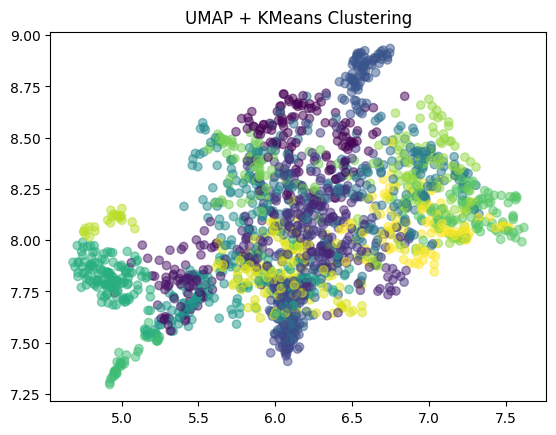

In [46]:
# Visualize the clusters
plt.scatter(red_emb[:, 0], red_emb[:, 1], c=pred, cmap='viridis', alpha=0.5)
plt.title('UMAP + KMeans Clustering')
plt.show()

In [47]:
# evaluate clustering results
nmi_score = normalized_mutual_info_score(pred,labels)
ari_score = adjusted_rand_score(pred,labels)

print(f'NMI: {nmi_score:.2f} \nARI: {ari_score:.2f}')

NMI: 0.46 
ARI: 0.27
